In [39]:
import random
from gtsrb_list import traffic_sign_classes
import cv2
import numpy as np
import os
import sys
import tensorflow as tf
from PIL import Image

from sklearn.model_selection import train_test_split

EPOCHS = 15
IMG_WIDTH = 30
IMG_HEIGHT = 30
NUM_CATEGORIES = 43
TEST_SIZE = 0.4

data_dir = './gtsrb'



In [40]:
def load_data(data_dir):
    images = []
    labels = []

    for type_ in os.listdir(data_dir):
        for image_name in os.listdir(os.path.join(data_dir, type_)):
            image_path = os.path.join(data_dir, type_, image_name)
            image_nda = cv2.imread(image_path)
            image_resized = cv2.resize(image_nda, (IMG_WIDTH, IMG_HEIGHT))
            images.append(image_resized)
            labels.append(int(type_))
    return images, labels

In [41]:
def get_model():
    """
    Returns a compiled convolutional neural network model. Assume that the
    `input_shape` of the first layer is `(IMG_WIDTH, IMG_HEIGHT, 3)`.
    The output layer should have `NUM_CATEGORIES` units, one for each category.
    """
    model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=(30, 30, 3)),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
        tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(43, activation="softmax")
    ])

    # Train neural network
    model.compile(
        optimizer="adam",
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model

In [42]:
def get_random_image(dataset):
    random_num = random.randint(0, len(dataset) - 1)
    data = dataset[random_num]
    arr = np.array(data, dtype=np.uint8).reshape(30, 30, 3)

    image = Image.fromarray(arr, 'RGB')
    image = image.resize((225, 225), Image.Resampling.LANCZOS)
    return image

In [43]:
images, labels = load_data(data_dir)

def main(images, labels):

    if len(sys.argv) not in [2, 3]:
        sys.exit("Usage: python traffic.py data_directory [model.h5]")

    labels = tf.keras.utils.to_categorical(labels)
    x_train, x_test, y_train, y_test = train_test_split(
        np.array(images), np.array(labels), test_size=TEST_SIZE
    )

    model = get_model()
    model.fit(x_train, y_train, epochs=EPOCHS)

    model.evaluate(x_test,  y_test, verbose=2)
    return model

model = main(images, labels)


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.0737 - loss: 5.8498
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.0861 - loss: 3.4740
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.1085 - loss: 3.3427
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.1605 - loss: 3.0270
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.3597 - loss: 2.1436
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.5608 - loss: 1.3984
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.6977 - loss: 0.9649
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.7711 - loss: 0.7357
Epoch 9/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8292 - loss: 0.5344
Epoch 10/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8693 - loss: 0.4037
Epoch 11/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - accuracy: 0.8816 - loss: 0.3868
Epoch 12/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step

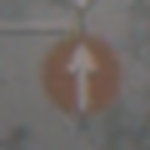

Input image shape: (1, 30, 30, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Raw predictions: [[1.60679345e-08 1.11665067e-04 9.46063738e-05 7.57371113e-02
  1.95241068e-04 1.07095884e-02 1.01709674e-07 2.04020168e-07
  7.35434354e-04 7.81143390e-05 7.36533457e-06 5.84253655e-07
  2.27825076e-05 1.14654598e-03 1.45245190e-06 2.28959436e-07
  5.01256210e-08 1.10333292e-06 3.76276876e-05 4.65093876e-07
  9.10263300e-01 2.05290163e-09 9.58174132e-06 7.01728186e-06
  4.08832390e-09 6.60468068e-04 2.14198280e-05 2.09278861e-09
  1.00622606e-06 5.47788295e-05 5.81624079e-07 1.79056849e-06
  1.34207369e-07 1.70785469e-07 9.92629312e-10 7.72141746e-08
  1.02152808e-06 1.66989422e-10 7.55346045e-05 1.87791883e-12
  4.43349570e-08 2.30138285e-05 1.52156412e-10]]
Predicted class: 20 - Parking


In [49]:
# Get a random image and resize for display
img = get_random_image(images)
img_display = img.resize((150, 150), Image.LANCZOS)
display(img_display)

# Preprocess the image for the model
img = img.resize((30, 30), Image.LANCZOS)
img = np.array(img, dtype=np.uint8) / 255.0  # Normalize
img = np.expand_dims(img, axis=0)  # Shape (1, 30, 30, 3)

# Check the shape of the image input
print(f"Input image shape: {img.shape}")

# Make a prediction
res = model.predict(img)
print(f"Raw predictions: {res}")

# Get the predicted class
predicted_class = np.argmax(res)
print(f"Predicted class: {predicted_class} - {traffic_sign_classes[predicted_class]}")
